In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, ReLU
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib import style
from matplotlib import animation
import tensorflow as tf
from IPython import display

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
X_train = np.expand_dims(x_train, axis=-1)
X_test = np.expand_dims(x_test, axis=-1)

In [5]:
model = Sequential()

model.add(Conv2D(2, (3,3), input_shape=(28, 28, 1), activation = "relu"))
model.add(Flatten())
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "relu"))
model.add(Dense(10, activation = "softmax"))

model.compile(optimizer = "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 5)


In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8825 - loss: 0.4225 - val_accuracy: 0.8883 - val_loss: 0.4044
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9000 - loss: 0.3558 - val_accuracy: 0.9030 - val_loss: 0.3609
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9157 - loss: 0.3027 - val_accuracy: 0.9139 - val_loss: 0.3220
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9287 - loss: 0.2568 - val_accuracy: 0.9193 - val_loss: 0.2945
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9381 - loss: 0.2232 - val_accuracy: 0.9315 - val_loss: 0.2649


In [9]:
predicted_class = model.predict(x_test[1].reshape(1, 28, 28, 1)).argmax()
print(f'Predicted class: {predicted_class}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted class: 2


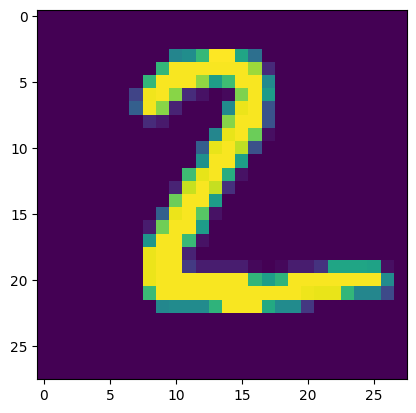

In [10]:
plt.imshow((x_test[1]))

In [48]:
%matplotlib tk

style.use('dark_background')

def viz(sample_num, fig):
    input_data = x_test[sample_num]
    output_truth = y_test[sample_num]
    prediction = model.predict(x_test[sample_num].reshape(-1, 28, 28, 1)).argmax()
    
    wghts = []
    for i in range(0, 5):
        input_layer = model.get_layer(index=0).input
        output_layer = model.get_layer(index=i).output
        
        get_layer_output_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
        
        output = get_layer_output_model((x_test[sample_num]).reshape(-1, 28, 28))
        wghts.append(output[0].numpy())
        
    
    fig.text(0.18, .94, "Neural Net Output Visualization", fontsize=15, color="white", ha='center')
    fig.text(0.18, .91, "(MNIST)", fontsize=14, color="white", ha='center')
    #fig.text(0.14, .89, "Libraries: Tensorflow, Matplotlib (for animation)" , fontsize=7, color="white", ha='center')
    fig.text(0.08, .035, "Github: @m4n4m4hm3d" , fontsize=9, color="white", ha='center')
    
    if output_truth == prediction:
        fig.suptitle("Correct!", fontsize=14, color="green")
        fig.text(0.505, .935, f"prediction {prediction}, Truth {output_truth}", fontsize=10, color="white", ha='center')
    else:
        fig.suptitle("Wrong!", fontsize=14, color="red")
        fig.text(0.505, 0.94, f"prediction {prediction}, Truth {output_truth}", fontsize=10, color="white", ha='center')


    ax0 = plt.subplot2grid((2,5), (0,0), rowspan=2, colspan=1)
    ax1 = plt.subplot2grid((2,5), (0,1), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((2,5), (1,1), rowspan=1, colspan=1)
    ax3 = plt.subplot2grid((2,5), (0,2), rowspan=2, colspan=1)
    ax4 = plt.subplot2grid((2,5), (0,3), rowspan=2, colspan=1)
    ax5 = plt.subplot2grid((2,5), (0,4), rowspan=2, colspan=1)

    ax0.imshow(x_test[sample_num], cmap = "gray")
    ax0.set_title("Image", fontsize = 10, color="white")

    conv1 = wghts[0][:, :, 0:1].reshape(26, 26, 1)
    conv2 = wghts[0][:, :, 1:2].reshape(26, 26, 1)
    ax1.imshow(conv1, cmap = "gray")
    ax1.set_title("Cov1", fontsize = 10, color="white")
    ax2.imshow(conv2, cmap = "gray")
    ax2.set_title("conv2", fontsize = 10, color="white")
    
    ax3.imshow(wghts[2].reshape(-1, 1), cmap= "gray")
    ax4.set_yticks(np.arange(0, 10, 1))
    ax3.set_xticklabels([])
    ax3.set_title("Layer 1\noutput", fontsize = 10, color="white")
    
    ax4.imshow(wghts[3].reshape(-1, 1), cmap= "gray")
    ax4.set_yticks(np.arange(0, 10, 1))
    ax4.set_xticklabels([])
    ax4.set_title("Layer 2\noutput", fontsize = 10, color="white")
    
    ax5.imshow(wghts[4].reshape(-1, 1), cmap= "gray")
    ax5.set_yticks(np.arange(0, 10, 1))
    ax5.set_title("Output\nLayer", fontsize = 10, color="white")
    ax5.set_xticklabels([])

display.clear_output()

In [49]:
#single image
fig = plt.figure(figsize=(12, 12))
viz(10, fig)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [51]:
#Video animation

%matplotlib tk
fig = plt.figure(figsize=(12, 12))
def animate(i, fig):
    fig.clear()
    viz(i, fig)
    plt.savefig(f"layer_outs/{i}.png")
ani = animation.FuncAnimation(fig, animate, frames=1000 , fargs=(fig,), interval=1000)